<a href="https://colab.research.google.com/github/AryamEzra/Minist_dataset_using_decision_trees/blob/main/Minist_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to the Digits Dataset

This notebook focuses on implementing and tuning a Decision Tree classifier on the Digits dataset. The Digits dataset is a collection of 1797 8x8 grayscale images of handwritten digits from 0 to 9. Each image is represented by a vector of 64 features (8x8 pixels), where each feature value is an integer from 0 to 16 representing the grayscale intensity. The task is to classify these images into their correct digit categories (0-9).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
digits = load_digits()
X, y = digits.data, digits.target
print('Digits dictionary content \n{}'.format(digits.keys()))

Digits dictionary content 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


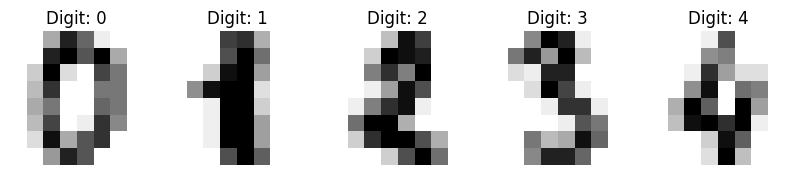

In [ ]:
# Display a few sample digits
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print('Training data:', X_train.shape)
print('Validation data:', X_val.shape)
print('Test data:', X_test.shape)

Training data: (1257, 64)
Validation data: (180, 64)
Test data: (360, 64)


Decsion Tree

In [ ]:
# Baseline model
class_tree = DecisionTreeClassifier(random_state=42)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_train = class_tree.predict(X_train)
y_pred_val = class_tree.predict(X_val)
y_pred_test = class_tree.predict(X_test)

In [ ]:
# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("\nBaseline Model Performance:")
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Validation accuracy:", accuracy_score(y_val, y_pred_val))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))



Confusion Matrix:
[[30  0  0  0  1  0  1  0  0  1]
 [ 0 23  1  0  0  0  1  1  1  1]
 [ 1  2 26  1  0  0  0  1  2  0]
 [ 0  2  0 29  1  0  0  0  1  1]
 [ 0  2  0  0 40  0  2  1  1  0]
 [ 0  0  0  1  1 42  2  0  0  1]
 [ 0  0  0  1  1  0 33  0  0  0]
 [ 0  0  0  0  1  0  0 32  1  0]
 [ 0  4  0  2  0  0  0  0 22  2]
 [ 0  0  0  6  2  0  0  0  0 32]]

Baseline Model Performance:
Train accuracy: 1.0
Validation accuracy: 0.8333333333333334
Test accuracy: 0.8583333333333333


## Evaluation Metrics

To assess the performance of our Decision Tree model, we are using the following metrics:

*   **Accuracy:** The proportion of correctly classified instances out of the total number of instances. It provides a general measure of the model's overall performance.
*   **Confusion Matrix:** A table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions for each class. It helps in understanding where the model is making errors.

## Conclusion from Baseline Model

  From the baseline model, it can be clearly seen that the model is overfitting because of the following values:
  * Train accuracy: 1.0
  * Validation accuracy: 0.8333
  * Test accuracy: 0.8583

In order to combat this, we will introduce one of the major hyperparameters called `max_depth` and see how that behaves.

In [ ]:
max_depth_values = range(1, 21) # Example: from 1 to 20

train_accuracies = []
val_accuracies = []
test_accuracies = []

print("Max Depth | Train Accuracy | Validation Accuracy | Test Accuracy")
print("-----------------------------------------------------------")

for depth in max_depth_values:
    class_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    class_tree.fit(X_train, y_train)

    y_pred_train = class_tree.predict(X_train)
    y_pred_val = class_tree.predict(X_val)
    y_pred_test = class_tree.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

    # Print the accuracies for the current max_depth
    print(f"{depth:<9}| {train_acc:<15.4f}| {val_acc:<20.4f}| {test_acc:.4f}")

Max Depth | Train Accuracy | Validation Accuracy | Test Accuracy
-----------------------------------------------------------
1        | 0.2084         | 0.1944              | 0.1639
2        | 0.3341         | 0.2444              | 0.2889
3        | 0.4829         | 0.3889              | 0.4611
4        | 0.5807         | 0.4778              | 0.5861
5        | 0.6850         | 0.6000              | 0.6639
6        | 0.8027         | 0.7056              | 0.7861
7        | 0.8990         | 0.7944              | 0.8361
8        | 0.9276         | 0.8222              | 0.8611
9        | 0.9562         | 0.8278              | 0.8667
10       | 0.9730         | 0.8333              | 0.8611
11       | 0.9881         | 0.8222              | 0.8528
12       | 0.9952         | 0.8278              | 0.8500
13       | 0.9976         | 0.8333              | 0.8500
14       | 1.0000         | 0.8333              | 0.8583
15       | 1.0000         | 0.8333              | 0.8583
16       | 1.0000   

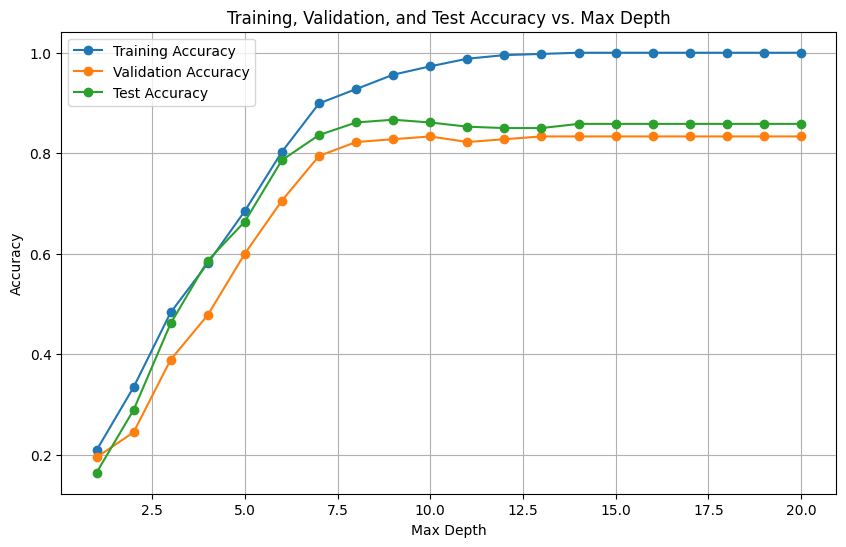

In [ ]:
# The plotting code
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(max_depth_values, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(max_depth_values, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion on Max Depth Tuning

Based on the analysis of training, validation, and test accuracies across different `max_depth` values, we observe that overfitting begins to occur after a `max_depth` of around 9 or 10. The training accuracy continues to increase, while the validation and test accuracies plateau or slightly decrease.

Therefore, the best result using just `max_depth` hyperparameter tuning is achieved with a `max_depth` of 10. This can be seen in the output below.

In [ ]:
# Train and evaluate Decision Tree with max_depth = 10
class_tree_tuned = DecisionTreeClassifier(max_depth=10, random_state=42)
class_tree_tuned.fit(X_train, y_train)

# Predictions
y_pred_train_tuned = class_tree_tuned.predict(X_train)
y_pred_val_tuned = class_tree_tuned.predict(X_val)
y_pred_test_tuned = class_tree_tuned.predict(X_test)

# Evaluation
print("\nConfusion Matrix with max_depth = 10:")
print(confusion_matrix(y_test, y_pred_test_tuned))

print("\nPerformance with max_depth = 10:")
print("Train accuracy:", accuracy_score(y_train, y_pred_train_tuned))
print("Validation accuracy:", accuracy_score(y_val, y_pred_val_tuned))
print("Test accuracy:", accuracy_score(y_test, y_pred_test_tuned))




Confusion Matrix with max_depth = 10:
[[30  0  0  0  1  0  1  0  0  1]
 [ 0 23  1  0  0  0  1  1  1  1]
 [ 0  2 25  2  0  0  0  1  3  0]
 [ 0  2  0 29  1  0  0  0  1  1]
 [ 0  2  0  0 39  0  2  2  1  0]
 [ 0  0  0  0  1 43  2  0  0  1]
 [ 0  0  0  1  1  0 33  0  0  0]
 [ 0  0  0  0  1  0  0 32  1  0]
 [ 0  2  0  2  0  1  0  0 24  1]
 [ 0  0  0  4  2  2  0  0  0 32]]

Performance with max_depth = 10:
Train accuracy: 0.9729514717581543
Validation accuracy: 0.8333333333333334
Test accuracy: 0.8611111111111112


## Exploring Other Hyperparameters with Grid Search

Max depth isn't the only major hyperparameter that affects decision trees. There are other significant hyperparameters that influence the tree's structure and performance, such as:

*   **`criterion`**: The function to measure the quality of a split (e.g., 'gini' or 'entropy').
*   **`min_samples_split`**: The minimum number of samples required to split an internal node.
*   **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.

We will now explore how combinations of these hyperparameters affect the model's performance by using a grid search to find the most optimal values from various combinations.

In [ ]:
# Grid Search for Decision Tree with more parameters
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],  # Values for max_depth
    'criterion': ['gini', 'entropy'],  # Values for criterion
    'min_samples_split': [2, 5, 10], # Values for min_samples_split
    'min_samples_leaf': [1, 3, 5]    # Values for min_samples_leaf
}

In [ ]:
class_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(class_tree, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort the DataFrame by mean test score
results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)

# Print the top 5 results
print("Top 5 Grid Search Results:")
print(results_df_sorted[['params', 'mean_test_score']].head())


print("\nBest hyperparameters:", grid_search.best_params_)
best_tree_model = grid_search.best_estimator_

Top 5 Grid Search Results:
                                               params  mean_test_score
72  {'criterion': 'entropy', 'max_depth': 7, 'min_...         0.843262
73  {'criterion': 'entropy', 'max_depth': 7, 'min_...         0.836122
45  {'criterion': 'entropy', 'max_depth': None, 'm...         0.835313
46  {'criterion': 'entropy', 'max_depth': None, 'm...         0.835313
82  {'criterion': 'entropy', 'max_depth': 10, 'min...         0.835313

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Predictions with the best model
y_pred_train_best = best_tree_model.predict(X_train)
y_pred_val_best = best_tree_model.predict(X_val)
y_pred_test_best = best_tree_model.predict(X_test)

In [ ]:
# Evaluation with the best model
print("\nConfusion Matrix for Best Model from Grid Search:")
print(confusion_matrix(y_test, y_pred_test_best))

print("\nPerformance with best hyperparameters from Grid Search:")
print("Train accuracy:", accuracy_score(y_train, y_pred_train_best))
print("Validation accuracy:", accuracy_score(y_val, y_pred_val_best))
print("Test accuracy:", accuracy_score(y_test, y_pred_test_best))


Confusion Matrix for Best Model from Grid Search:
[[30  0  1  0  1  1  0  0  0  0]
 [ 0 25  0  0  1  0  0  0  0  2]
 [ 0  2 24  1  1  0  1  1  3  0]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 2  1  0  0 40  2  0  1  0  0]
 [ 0  1  0  0  0 43  2  0  0  1]
 [ 0  1  0  0  1  0 32  0  1  0]
 [ 0  1  1  0  0  0  0 29  0  3]
 [ 0  0  1  0  2  1  0  1 25  0]
 [ 0  0  0  1  0  0  0  2  0 37]]

Performance with best hyperparameters from Grid Search:
Train accuracy: 0.9649960222752586
Validation accuracy: 0.85
Test accuracy: 0.8777777777777778


## Final Conclusion on Decision Tree

Based on this, we can see that performance can be increased by tuning hyperparameters like `max_depth`, `criterion`, `min_samples_split`, and `min_samples_leaf`. When run in combination using a grid search, we can find the optimal values.

Comparing the performance after tuning only `max_depth` (with optimal max_depth of 10):
- Train accuracy: 0.9729514717581543
- Validation accuracy: 0.8333333333333334
- Test accuracy: 0.8611111111111112

To the performance after comprehensive grid search tuning (with best hyperparameters: `criterion`: entropy, `max_depth`: 7, `min_samples_leaf`: 1, `min_samples_split`: 2):
- Train accuracy: 0.9649960222752586
- Validation accuracy: 0.85
- Test accuracy: 0.8777777777777778

Though grid search is computationally expensive, it still has the advantage of finding the most optimal combination out of all the combinations, and since our parameter grid and dataset were relatively small, we were able to run it and see how it affected the decision trees.

## Limitations and Future Work

While the Decision Tree model performed reasonably well, it has limitations like sensitivity to data variations and potential instability. To improve, future steps could involve trying other algorithms (like Random Forests or neural networks) or exploring more advanced tuning methods.